# 指数变换

In [3]:
# 指数变换是个变换族，对数变换只是它的一个特例——方差稳定变换
# 为什么“方差稳定”是个好性质？ 考虑泊松分布
# 例2-12 对Yelp商家点评数量的Box-Cox变换
from scipy import stats
import pandas as pd
import json
import matplotlib.pyplot as plt

biz_file = open('data/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])  # .json格式文件的处理，类似列表生成式
biz_file.close()

# Box-Cox变换假定输入数据都是正的
# 检查数据的最小值以确定满足假定
biz_df['review_count'].min()

3

In [6]:
# 设置输入参数 λ 为0，使用对数变换（没有固定长度的位移，这里ln，与之前log10即lg不同）
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

# 默认情况下，SciPy在实现Box-Cox转换时，会找出使得输出最接近于正态分布的λ参数
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.5631161310538185

Text(0, 0.5, 'Occurrence')

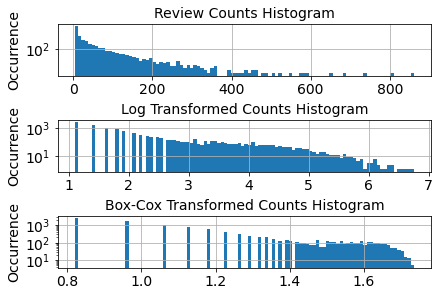

In [8]:
# 例2-13 初始、对数变换后和Box-Cox变换后的点评数量直方图可视化
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)

# 初始点评数量直方图
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 对数变换后的点评数量
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# 最优Box-Cox变换后的点评数量
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

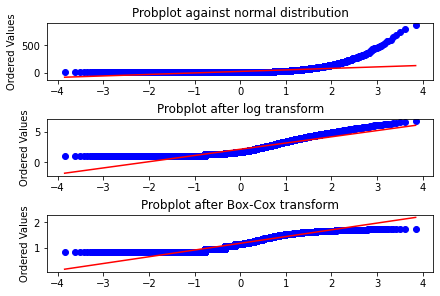

In [11]:
# 例2-14 初始和变换后点评数量的概率图，并和正态分布进行对比
# 概率图probplot：本质上是一种表示实测分位数和理论分位数的关系的散点图

fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)

prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after Box-Cox transform')
